In [96]:
import os
import sys
import re
import time
import math
from datetime import timedelta
from datetime import timezone
from datetime import datetime
import json

# Third Party
import pandas as pd
import numpy as np
import requests

# PLOT
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_theme()

In [97]:
n_round = 59

from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv())
PUBLIC_KEY = os.getenv("REMOTE_TEST_PUBLIC_KEY1")

curl -X POST "https://df-sql.oceandao.org/challenge/data" \
-H "Content-Type: application/json" \
-d '{"query": {"round": 51}}'

In [98]:
#response = requests.get(f"https://df-sql.oceandao.org/challenge/data/?round={n_round}")

payload = {"query": {"round": n_round}}
headers = {"Content-Type": "application/json; charset=utf-8"}
response =  requests.post('https://df-sql.oceandao.org/challenge/data',  data=json.dumps(payload), headers=headers)

In [99]:
json.dumps(payload)

'{"query": {"round": 59}}'

In [100]:
response

<Response [200]>

In [101]:
response.json()

[{'from_addr': '0x0006f31311c4aa4652c31692d11812c993fda0b2',
  'nft_addr': '0xb4ec5637f32e2f33458675437c1a79476549b78e',
  'nmse': 37.8699989319,
  'round': 59},
 {'from_addr': '0x00087336e23054279cdc4e389afe48bf83a6e821',
  'nft_addr': '0x79af88fbeff1fdc9e198594a6cc8c64d35492e3f',
  'nmse': 8.9870004654,
  'round': 59},
 {'from_addr': '0x0008b73a8363803e98f475a9d5b3579d8672c965',
  'nft_addr': '0xc43e2488fedc51292ca08a8accb95bccadf6dcfe',
  'nmse': 2.2009999752,
  'round': 59},
 {'from_addr': '0x0009ef12a01ce077b62b7242f998b8dbdb08e866',
  'nft_addr': '0x90a5576b9b814de3b57228623bd5f63f03657b40',
  'nmse': 8.3800001144,
  'round': 59},
 {'from_addr': '0x0020a95bc0c3f056d0421b1126fb3c2831574d54',
  'nft_addr': '0x57581ddfc1f59850efc7aea700e97f123e1b289c',
  'nmse': 3.6489999294,
  'round': 59},
 {'from_addr': '0x00230193ae083e8b4c60d4bddf23da4fe155b4f3',
  'nft_addr': '0x62a69cba7df50752ee1412bd600d12343e0b8142',
  'nmse': 3.9560000896,
  'round': 59},
 {'from_addr': '0x002305cbeced1f5

In [102]:
list_dict = response.json()
df = pd.DataFrame.from_dict(list_dict)
df

,from_addr,nft_addr,nmse,round
0,0x0006f31311c4aa4652c31692d11812c993fda0b2,0xb4ec5637f32e2f33458675437c1a79476549b78e,37.869999,59
1,0x00087336e23054279cdc4e389afe48bf83a6e821,0x79af88fbeff1fdc9e198594a6cc8c64d35492e3f,8.987000,59
2,0x0008b73a8363803e98f475a9d5b3579d8672c965,0xc43e2488fedc51292ca08a8accb95bccadf6dcfe,2.201000,59
3,0x0009ef12a01ce077b62b7242f998b8dbdb08e866,0x90a5576b9b814de3b57228623bd5f63f03657b40,8.380000,59
4,0x0020a95bc0c3f056d0421b1126fb3c2831574d54,0x57581ddfc1f59850efc7aea700e97f123e1b289c,3.649000,59
...,...,...,...,...
4888,0xffe171a23b40937bcafc3493e19c44f4274dbf86,0xedb8b71b72b24c250dfa42571733c788cd456f89,0.339500,59
4889,0xffea903d570f601e20ded7859b1b09ff26ea66e2,0x95eb7ae3d428432e9cadbdbee1ab61983d4c62c6,8.973000,59
4890,0xffee0a2b6df34316aab5a19ac170e806df8090e6,0x8bdc03111acbb65768b882a587be1bdce4295bb6,1.311000,59
4891,0xfff0473594ef0a30231e3657d3ac5390cab3b35f,0x4c05135cd85ee0cfcb2686832007f06fef73ff90,2.361000,59


In [103]:
df = df.loc[df["nmse"]!=1]
df.sort_values(by="nmse", ignore_index=True, inplace=True)
df

/var/folders/m4/ng3wlwj109df2b8j9f4y4m7m0000gn/T/ipykernel_62231/3629192000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by="nmse", ignore_index=True, inplace=True)


,from_addr,nft_addr,nmse,round
0,0x6414148be288675e93e1d9356b5a4bbe46fb890c,0x1e1743b887a2aafd4261ce697cf7f81c0d21f199,0.103400,59
1,0x0b912d8dc370a7f606abab7dc173fde6ba7e7d4d,0xe73b0bd05bf52eb9f75c9ee43336b2b1388ccf87,0.134300,59
2,0x6ab0928bdfb989e509735798d024ef1315827a18,0x5e022c673b1076de26adaa40b225a716820d5eed,0.137100,59
3,0x17be9eeb4be9abb38c3c20b84253225f5787aed1,0xd4c63cc494b1ee13056783d810569a04bfd5b388,0.137300,59
4,0x79c19ce6e5823bc73785055559faa6064519e2cb,0xbc6fd5059d0a055215577b4780a1a9c2f19d3014,0.137900,59
...,...,...,...,...
4886,0x111cb7d9111b1473f3a195c6bafdc4b59c4e6cdb,0xa2a0dec17fb0410efbed19a9d613c4847f059f0a,586.599976,59
4887,0xf4d414167e35593e4a19e5fdf2ed18d9f3664ee6,0xac26c5c0c802badc84df9f0457bc9a8dc9a2cb58,635.799988,59
4888,0x301d464bf2ab6755be3f658101142a9ca05760e7,0xf8d9187b619e7ba59f3d41150cffba12617ca7fc,702.200012,59
4889,0x0fa63c2e29a613944ce2e72184332de82ece0513,0x0581681e6194c1396d3e833b921f33ab526c5970,763.500000,59


In [104]:
df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]

,from_addr,nft_addr,nmse,round
260,0xa6fb159f491ed6f33b077ee6e1d271b53ff2cb8b,0xb9984615ff4f92775fa66989a20a872811edae0a,0.4331,59


In [105]:
df["from_addr"].nunique()

4891

In [106]:
df[(df["nmse"] > 1) & (df["nmse"] < 1.529)]["from_addr"].nunique()

431

In [107]:
df[(df["nmse"] < 1)]["from_addr"].nunique()

1352

(0.0, 10.0)

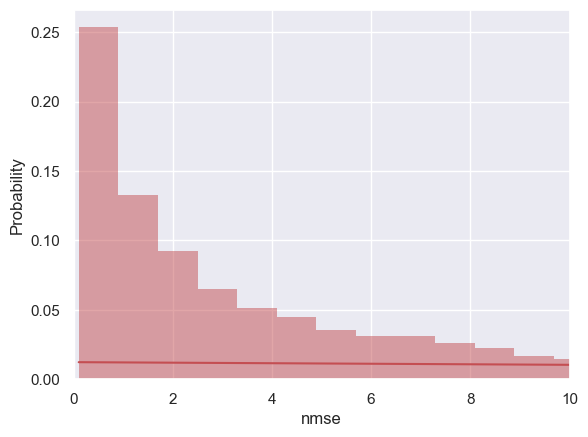

In [108]:
sns.histplot(
    data=df,
    x="nmse",  
    stat="probability", 
    kde=True, 
    color="r",
    label="TEST")
fig = plt.gcf()
ax = fig.gca()
ax.set_xlim([0,10])

In [109]:
df[(df["nmse"] == 1)]["from_addr"].nunique()

0

In [110]:
df[(df["nmse"] == 1)]["from_addr"].nunique() / df.shape[0]

0.0

In [111]:
df[(df["nmse"] == 1)].shape[0]

0

In [112]:
df.shape

(4891, 4)

In [113]:
df.describe()

,nmse,round
count,4891.000000,4891.0
mean,10.217612,59.0
std,131.226175,0.0
min,0.103400,59.0
25%,0.883750,59.0
50%,2.738000,59.0
75%,7.660000,59.0
max,8932.000000,59.0


In [118]:
n_part = df["from_addr"].nunique()
nmse_ = df[df["from_addr"].str.lower() == PUBLIC_KEY.lower()]["nmse"].values[0]
ranking = df[df["nmse"] < nmse_]["from_addr"].nunique() + 1
print(f"ROUND # {n_round}")
print(f'RANKING :  {ranking} / {n_part}')
print(f"Top {round(100*ranking/n_part,2)} % ")

ROUND # 59
RANKING :  261 / 4891
Top 5.34 % 
